<a href="https://colab.research.google.com/github/riccardoscut/riccardoscut/blob/main/CrypToData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a simple project to retrieve, clean, manipulate, and analyze cryptocurrency data using Python and pandas can be a fun way to get hands-on experience with data manipulation and analysis. Here's a step-by-step guide on how to approach this project.


1. Set Up Your Environment
Ensure you have the necessary packages installed. You'll need the following:

2. Data Retrieval
You can retrieve cryptocurrency data using public APIs like the CoinGecko API or the CoinMarketCap API. CoinGecko doesn’t require authentication, so it’s a simpler starting point.


In [1]:

pip install pandas requests matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Importiamo i moduli

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # data visualization
pd.options.mode.chained_assignment = None  # suppress DataFrame slice warning

Read bitcoin price csv


In [3]:
df = pd.read_csv('dataset.csv')

Bitcoin

In [4]:
btc = df.loc[df['crypto_name'] == 'Bitcoin'].copy()
btc = btc.set_index('date')
btc.index = pd.to_datetime(btc.index)
btc

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,,
2013-05-05,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin
2013-05-06,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin
2013-05-07,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin
2013-05-08,7,109.599998,115.779999,109.599998,113.566002,0.000000e+00,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin
2013-05-09,9,113.199997,113.459999,109.260002,112.669998,0.000000e+00,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin
...,...,...,...,...,...,...,...,...,...
2022-09-25,72692,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11,2022-09-25T23:59:59.999Z,Bitcoin
2022-10-02,72752,19311.848708,19370.309281,18970.620583,19044.107272,2.076596e+10,3.650248e+11,2022-10-02T23:59:59.999Z,Bitcoin
2022-10-09,72815,19417.479411,19542.538654,19349.258953,19446.426194,1.683726e+10,3.728768e+11,2022-10-09T23:59:59.999Z,Bitcoin


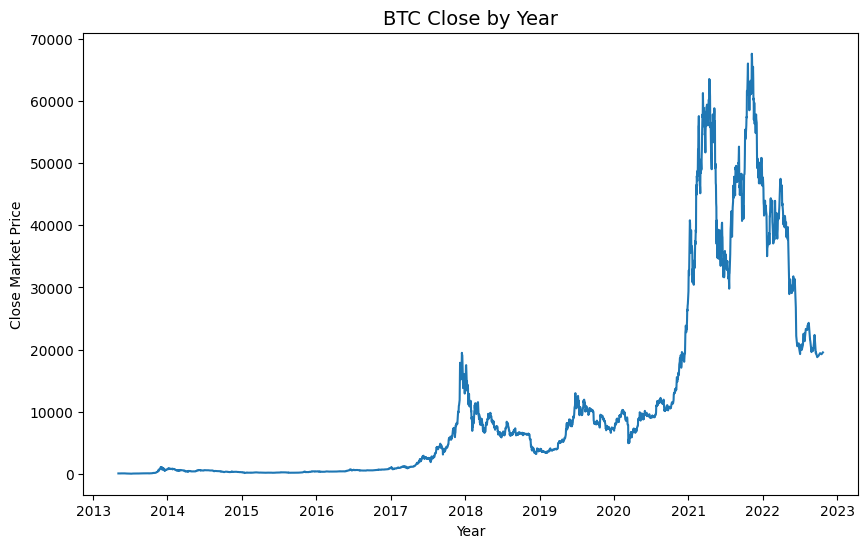

In [5]:
# Plot btc 'close' column
plt.figure(figsize=(10,6))
plt.title('BTC Close by Year', fontsize=14)
plt.ylabel('Close Market Price')
plt.xlabel('Year')
plt.plot(btc['close'])

Analyze Volatility: La volatilità è misurata come la deviazione standard dei prezzi di chiusura sui 3/7/30 giorni precedenti.

In [6]:
# Calcolo del cambio di prezzo rispetto al giorno precedente
btc['daily_return'] = btc['close'].pct_change() * 100

# Calcolo della volatilità rispetto ai 3, 7 e 30 giorni precedenti
btc['volatility_3d'] = btc['close'].rolling(window=3).std()
btc['volatility_7d'] = btc['close'].rolling(window=7).std()
btc['volatility_30d'] = btc['close'].rolling(window=30).std()

# Visualizzare le prime righe per controllare i calcoli
#print(btc[['close', 'daily_return', 'volatility_3d', 'volatility_7d', 'volatility_30d']].head(100000))
print(btc.head()) 

            Unnamed: 0        open        high         low       close  \
date                                                                     
2013-05-05           0  112.900002  118.800003  107.142998  115.910004   
2013-05-06           2  115.980003  124.663002  106.639999  112.300003   
2013-05-07           4  112.250000  113.444000   97.699997  111.500000   
2013-05-08           7  109.599998  115.779999  109.599998  113.566002   
2013-05-09           9  113.199997  113.459999  109.260002  112.669998   

            volume     marketCap                 timestamp crypto_name  \
date                                                                     
2013-05-05     0.0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin   
2013-05-06     0.0  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin   
2013-05-07     0.0  1.240594e+09  2013-05-07T23:59:59.999Z     Bitcoin   
2013-05-08     0.0  1.264049e+09  2013-05-08T23:59:59.999Z     Bitcoin   
2013-05-09     0.0  1.254535e+09  201

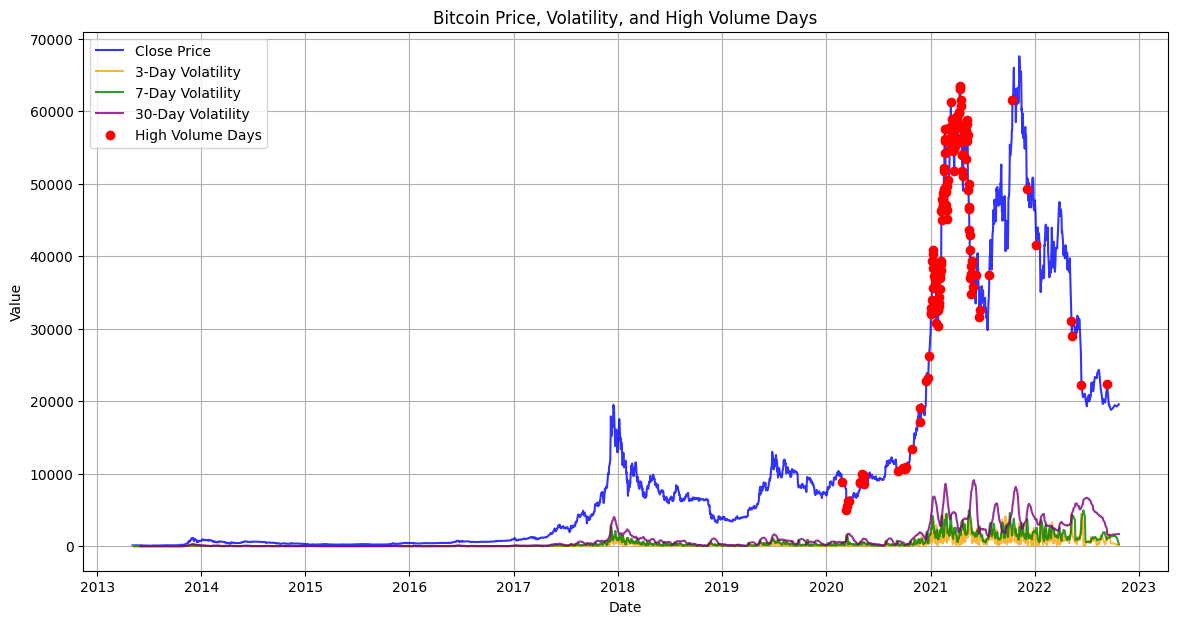

In [7]:
import matplotlib.pyplot as plt

# Calcolo della soglia per i grandi volumi (media + 1 std)
volume_threshold = btc['volume'].mean() + 2 * btc['volume'].std()

# Identificazione dei giorni con grandi volumi
btc['high_volume'] = btc['volume'] > volume_threshold
high_volume_days = btc[btc['high_volume']]

# Grafico del prezzo, volatilità e grandi volumi
plt.figure(figsize=(14, 7))

# Linea del prezzo
plt.plot(btc.index, btc['close'], label='Close Price', alpha=0.8, color='blue')

# Linee delle volatilità
plt.plot(btc.index, btc['volatility_3d'], label='3-Day Volatility', alpha=0.8, color='orange')
plt.plot(btc.index, btc['volatility_7d'], label='7-Day Volatility', alpha=0.8, color='green')
plt.plot(btc.index, btc['volatility_30d'], label='30-Day Volatility', alpha=0.8, color='purple')

# Marker per i giorni con grandi volumi
plt.scatter(high_volume_days.index, high_volume_days['close'], color='red', label='High Volume Days', zorder=5)

# Configurazione del grafico
plt.title('Bitcoin Price, Volatility, and High Volume Days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

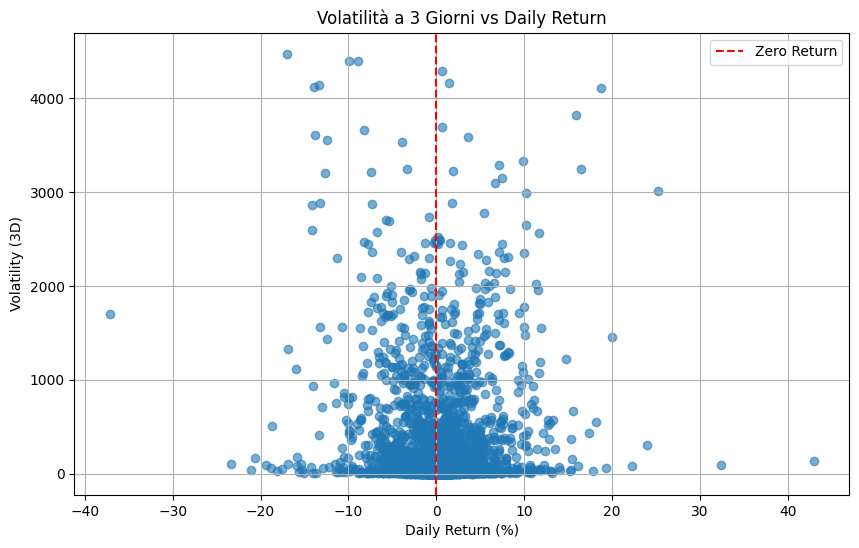

Correlazione tra daily return e volatilità:
               daily_return  volatility_3d
daily_return       1.000000      -0.022394
volatility_3d     -0.022394       1.000000


In [8]:
# Scatter plot per confrontare volatilità e daily return
plt.figure(figsize=(10, 6))
plt.scatter(btc['daily_return'], btc['volatility_3d'], alpha=0.6)
plt.title('Volatilità a 3 Giorni vs Daily Return')
plt.xlabel('Daily Return (%)')
plt.ylabel('Volatility (3D)')
plt.axvline(0, color='red', linestyle='--', label='Zero Return')
plt.legend()
plt.grid()
plt.show()

# Calcolo della correlazione
correlation = btc[['daily_return', 'volatility_3d']].corr()
print("Correlazione tra daily return e volatilità:")
print(correlation)

In [9]:
# Date aggiornate degli halving
halving_dates = [
    pd.Timestamp('2012-11-28'),
    pd.Timestamp('2016-07-09'),
    pd.Timestamp('2020-05-11'),
    pd.Timestamp('2024-04-19')  # Halving futuro stimato
]

# Finestra di 730 giorni prima e dopo ogni halving
segments = []
for halving in halving_dates:
    start_date = halving - pd.Timedelta(days=730)
    end_date = halving + pd.Timedelta(days=730)
    segment = btc[(btc.index >= start_date) & (btc.index <= end_date)].copy()
    segment['period'] = f"Halving_{halving.year}"
    segments.append(segment)

# Concatenare i segmenti
btc_segmented = pd.concat(segments)

# Visualizzare la distribuzione dei dati segmentati
print(btc_segmented['period'].value_counts())

period
Halving_2016    1461
Halving_2020    1367
Halving_2012     573
Halving_2024      60
Name: count, dtype: int64


In [10]:
# Calcolo delle soglie di volume per ogni periodo
soglie = {}
for period, group in btc_segmented.groupby('period'):
    soglia = group['volume'].quantile(0.95)  # Soglia del 95° percentile
    soglie[period] = soglia
    print(f"Soglia per {period}: {soglia}")

Soglia per Halving_2012: 49595640.0
Soglia per Halving_2016: 8660880384.0
Soglia per Halving_2020: 63579842098.46213
Soglia per Halving_2024: 50247163279.063995


In [11]:
high_volume_days = []
for period, group in btc_segmented.groupby('period'):
    threshold = soglie[period]
    high_volume = group[group['volume'] > threshold]
    high_volume_days.append(high_volume)

# Concatenare i risultati
high_volume_days = pd.concat(high_volume_days)

# Visualizzare
print("Giorni con volumi significativi:")
print(high_volume_days[['volume', 'period']])

Giorni con volumi significativi:
                  volume        period
date                                  
2014-01-05  7.289850e+07  Halving_2012
2014-01-06  8.556570e+07  Halving_2012
2014-01-07  8.131170e+07  Halving_2012
2014-01-08  7.417560e+07  Halving_2012
2014-01-09  5.999860e+07  Halving_2012
...                  ...           ...
2022-01-07  8.419661e+10  Halving_2020
2022-05-11  7.038886e+10  Halving_2020
2022-05-10  5.981104e+10  Halving_2024
2022-05-11  7.038886e+10  Halving_2024
2022-06-14  5.091358e+10  Halving_2024

[174 rows x 2 columns]


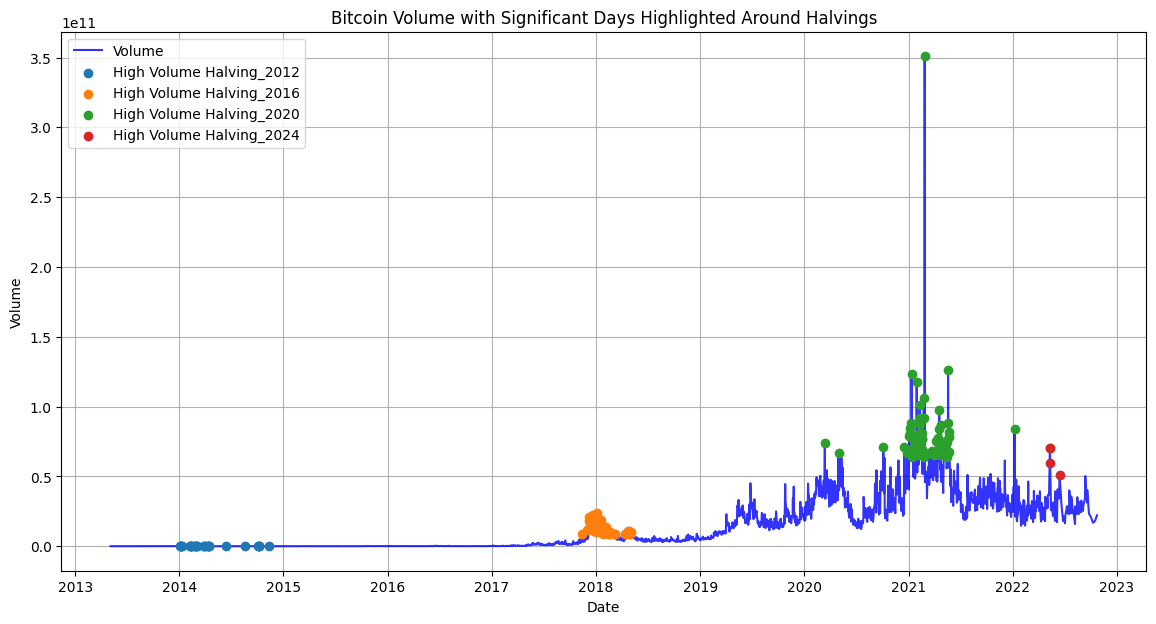

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Linea del volume
plt.plot(btc.index, btc['volume'], label='Volume', alpha=0.8, color='blue')

# Punti per giorni con grandi volumi
for period, group in high_volume_days.groupby('period'):
    plt.scatter(group.index, group['volume'], label=f'High Volume {period}', zorder=5)

# Configurazione del grafico
plt.title('Bitcoin Volume with Significant Days Highlighted Around Halvings')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

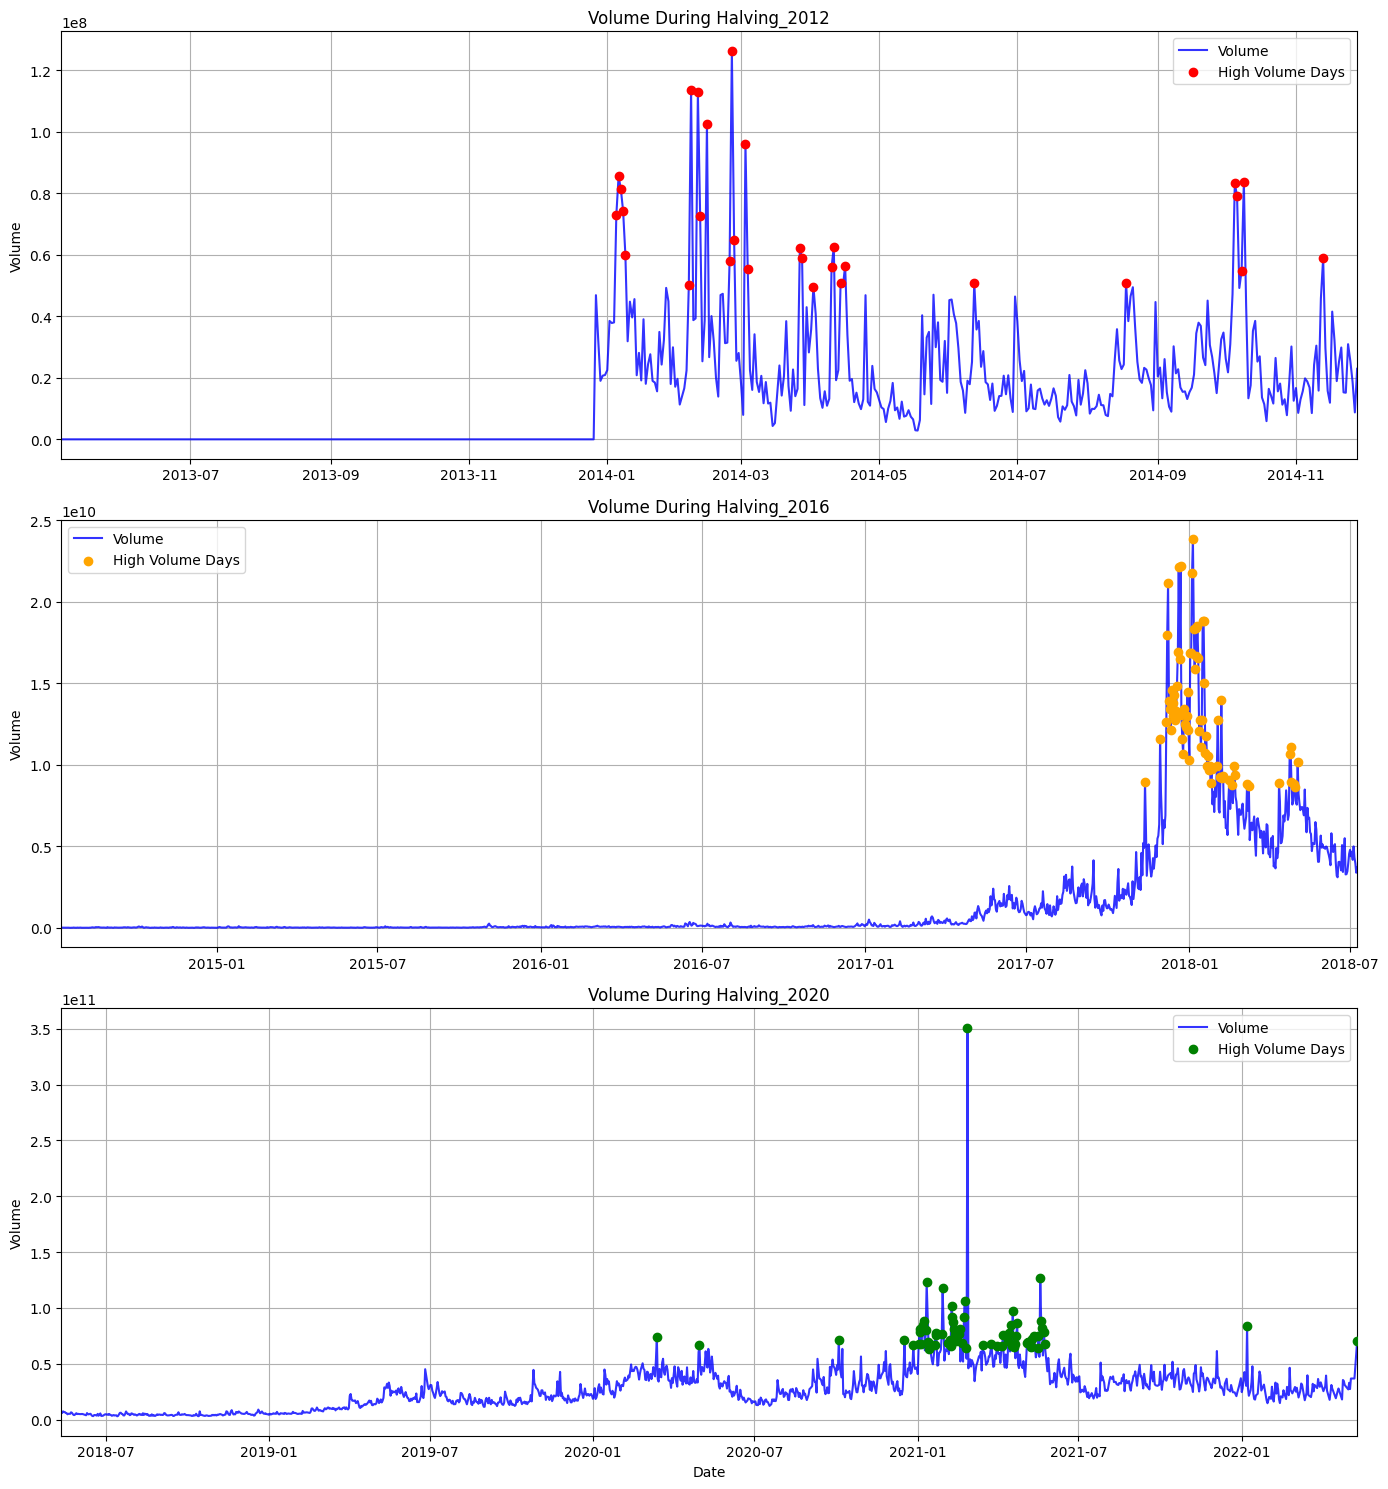

In [13]:
import matplotlib.pyplot as plt

# Impostare la figura e i sottografi
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=False)

# Titoli e colori per ogni periodo
halving_periods = ['Halving_2012', 'Halving_2016', 'Halving_2020']
colors = ['red', 'orange', 'green']

# Loop attraverso i periodi
for i, period in enumerate(halving_periods):
    # Filtra i dati per il periodo corrente
    period_data = btc_segmented[btc_segmented['period'] == period]
    period_high_volume = high_volume_days[high_volume_days['period'] == period]

    # Grafico per il periodo
    axes[i].plot(period_data.index, period_data['volume'], label='Volume', alpha=0.8, color='blue')
    axes[i].scatter(period_high_volume.index, period_high_volume['volume'], color=colors[i], label='High Volume Days', zorder=5)
    
    # Zoom sull'asse temporale
    axes[i].set_xlim([period_data.index.min(), period_data.index.max()])
    axes[i].set_title(f'Volume During {period}')
    axes[i].set_ylabel('Volume')
    axes[i].grid(True)
    axes[i].legend()

# Aggiungere l'etichetta sull'asse x per l'ultimo grafico
axes[-1].set_xlabel('Date')

# Mostrare i grafici
plt.tight_layout()
plt.show()

# Carica il dataset delle notizie di Bitcoin


Punti Chiave del Dataset

1.	Fonte delle Notizie:
		•	Le notizie sono raccolte da Cryptopanic.com, una piattaforma di aggregazione di notizie su criptovalute.
		•	Sono disponibili 165.000 notizie, un numero significativo per l’analisi.
2.	Filtro Relativo alle Criptovalute:
		•	Il dataset copre le notizie per 430 criptovalute, incluse le più popolari come BTC, ETH, SOL, ecc.
		•	Non tutte le notizie sono specifiche per una criptovaluta; alcune potrebbero essere generali o riguardare più asset contemporaneamente.
3.	Campo Temporale:
		•	Le notizie per il Bitcoin (BTC) sono disponibili dal 29 settembre 2017 al 24 settembre 2024.
		•	Il range temporale è coerente con il periodo di interesse per l’analisi del prezzo del Bitcoin.
4.	Etichettatura delle Notizie:
		•	Le notizie sono etichettate dai voti degli utenti, con attributi come:
		•	Positive
		•	Negative
		•	Important
		•	Questo ti dà un punto di partenza per analizzare il sentiment e la rilevanza.
5.	Limitazioni dell’API:
		•	L’API di Cryptopanic permette di estrarre solo 200 notizie per filtro, suggerendo che il dataset scaricato è stato costruito aggregando chiamate multiple all’API.

Implicazioni per l’Analisi

1.	Non tutte le notizie sono relative al Bitcoin:
	    •	Dovremo filtrare il dataset per selezionare solo le notizie relative al Bitcoin.
	    •	BTC ha 17.745 notizie, quindi è una base solida per l’analisi.
2.	Etichette per il Sentiment:
	    •	Le etichette positive/negative/important permettono un’analisi diretta del sentiment senza dover costruire un modello da zero.
3.	Distribuzione Temporale:
	    •	La copertura non è uniforme: il numero di notizie può variare nel tempo in base alla popolarità o agli eventi del mercato.
	    •	I periodi con meno notizie potrebbero riflettere una minore attività mediatica o limiti nella raccolta dei dati.

Strategia per Utilizzare Tutte le Notizie

Invece di filtrare il dataset solo per le notizie sul Bitcoin, possiamo:
1.	Includere Tutte le Notizie:
	•	Considerare tutte le notizie relative a tutte le criptovalute nel dataset.
2.	Raggruppare e Calcolare Metriche Generali:
	•	Calcoliamo metriche come:
	•	Numero di notizie per giorno.
	•	Sentiment aggregato per giorno (positivo/negativo/importante).
	•	Volume di notizie su tutto il mercato.
3.	Identificare Periodi di Interesse:
	•	Analizziamo se cambi significativi di prezzo o volumi del Bitcoin coincidono con variazioni nei dati sulle notizie di tutto il settore.

In [14]:
news_data = pd.read_csv('cryptopanic_news.csv')
news_data


,id,title,sourceId,date,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments
0,873,ApeCoin Community Votes to Stay on Ethereum,2,6/9/2022 6:57,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0
1,875,Terraform Labs Co-Founder Denies Accusations o...,2,6/9/2022 6:03,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0
2,876,Anchor dev claims he warned Do Kwon over unsus...,7,6/9/2022 5:39,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0
3,877,"With 12 Key Measures of Prices, Truflation’s R...",11,6/9/2022 5:32,https://cryptopanic.com/news/15442724/With-12-...,0,0,0,0,0,0,0,0,0
4,878,'Father' of the Metaverse Neal Stephenson laun...,7,6/9/2022 5:28,https://cryptopanic.com/news/15442350/Father-o...,0,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164996,174621,"ETH-based Memecoin, MOG Hits New ATH, Enters T...",144,7/15/2024 13:15,https://cryptopanic.com/news/19688034/ETH-base...,0,0,0,0,0,0,0,0,0
164997,174622,Mog Coin Price Continues to Surge as New Wiene...,144,7/15/2024 11:24,https://cryptopanic.com/news/19687607/Mog-Coin...,0,0,0,0,0,0,0,0,0
164998,174623,Ethereum Memecoin MOG Becomes Biggest 24H Gain...,134,7/15/2024 7:02,https://cryptopanic.com/news/19687017/Ethereum...,0,0,0,0,0,0,0,0,0
164999,174624,Year-to-Date Crypto Winners: Meme Coins Outper...,24,7/13/2024 14:20,https://cryptopanic.com/news/19683727/Year-to-...,0,0,0,0,0,0,0,0,0


In [15]:
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce') 
news_data['timestamp'] = pd.to_datetime(news_data['date'], errors='coerce')


In [16]:
# Identifica cambiamenti significativi di prezzo (es. > 5%)
#print(btc.columns)

# Rimuovi il fuso orario da entrambe le colonne 'date'
news_data['date_normal'] = news_data['timestamp'].dt.date
#print(significant_changes['timestamp'].dtype)
#print(news_data['date'].dtype)

In [17]:
news_data

,id,title,sourceId,date,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments,timestamp,date_normal
0,873,ApeCoin Community Votes to Stay on Ethereum,2,6/9/2022 6:57,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0,2022-06-09 06:57:00,2022-06-09
1,875,Terraform Labs Co-Founder Denies Accusations o...,2,6/9/2022 6:03,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0,2022-06-09 06:03:00,2022-06-09
2,876,Anchor dev claims he warned Do Kwon over unsus...,7,6/9/2022 5:39,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0,2022-06-09 05:39:00,2022-06-09
3,877,"With 12 Key Measures of Prices, Truflation’s R...",11,6/9/2022 5:32,https://cryptopanic.com/news/15442724/With-12-...,0,0,0,0,0,0,0,0,0,2022-06-09 05:32:00,2022-06-09
4,878,'Father' of the Metaverse Neal Stephenson laun...,7,6/9/2022 5:28,https://cryptopanic.com/news/15442350/Father-o...,0,1,0,2,0,0,0,0,0,2022-06-09 05:28:00,2022-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164996,174621,"ETH-based Memecoin, MOG Hits New ATH, Enters T...",144,7/15/2024 13:15,https://cryptopanic.com/news/19688034/ETH-base...,0,0,0,0,0,0,0,0,0,2024-07-15 13:15:00,2024-07-15
164997,174622,Mog Coin Price Continues to Surge as New Wiene...,144,7/15/2024 11:24,https://cryptopanic.com/news/19687607/Mog-Coin...,0,0,0,0,0,0,0,0,0,2024-07-15 11:24:00,2024-07-15
164998,174623,Ethereum Memecoin MOG Becomes Biggest 24H Gain...,134,7/15/2024 7:02,https://cryptopanic.com/news/19687017/Ethereum...,0,0,0,0,0,0,0,0,0,2024-07-15 07:02:00,2024-07-15
164999,174624,Year-to-Date Crypto Winners: Meme Coins Outper...,24,7/13/2024 14:20,https://cryptopanic.com/news/19683727/Year-to-...,0,0,0,0,0,0,0,0,0,2024-07-13 14:20:00,2024-07-13


In [18]:
# Conteggio delle news per giorno
news_per_day = news_data.groupby('date_normal').size().reset_index(name='news_count')

# Visualizza le prime righe del conteggio
print(news_per_day.head())

  date_normal  news_count
0  2017-09-23           1
1  2017-09-29           1
2  2017-10-17           1
3  2017-10-31           2
4  2017-11-09           1


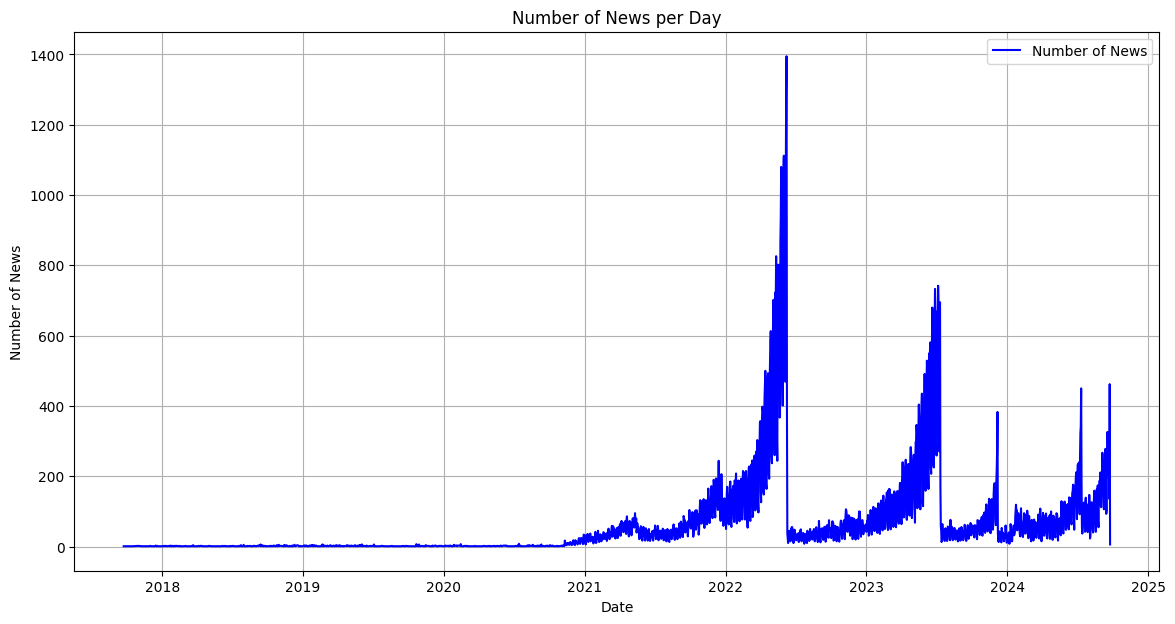

In [19]:
import matplotlib.pyplot as plt

# Creazione del grafico
plt.figure(figsize=(14, 7))
plt.plot(news_per_day['date_normal'], news_per_day['news_count'], label='Number of News', color='blue')
plt.title('Number of News per Day')
plt.xlabel('Date')
plt.ylabel('Number of News')
plt.grid()
plt.legend()
plt.show()

Codice per Analisi Generale

1. Conteggio e Sentiment per Giorno

Raggruppiamo tutte le notizie per data e calcoliamo metriche generali.

In [20]:
# Conteggio notizie per giorno
news_per_day = news_data.groupby('date_normal').agg({
    'id': 'count',                # Numero di notizie
    'positive': 'sum',            # Sentiment positivo aggregato
    'negative': 'sum',            # Sentiment negativo aggregato
    'important': 'sum'            # Numero di notizie marcate come importanti
}).reset_index()

# Rinomina le colonne
news_per_day.rename(columns={
    'id': 'news_count',
    'positive': 'total_positive',
    'negative': 'total_negative',
    'important': 'total_important'
}, inplace=True)

# Calcola il sentiment netto (positivo - negativo)
news_per_day['net_sentiment'] = news_per_day['total_positive'] - news_per_day['total_negative']

# Visualizza le prime righe
print(news_per_day.head())

  date_normal  news_count  total_positive  total_negative  total_important  \
0  2017-09-23           1               3               0                1   
1  2017-09-29           1               5               4                0   
2  2017-10-17           1               2               0                1   
3  2017-10-31           2               5               5                5   
4  2017-11-09           1               0               3                1   

   net_sentiment  
0              3  
1              1  
2              2  
3              0  
4             -3  


2. Visualizzare la Distribuzione Generale

Esploriamo come il volume di notizie e il sentiment netto si distribuiscono nel tempo.

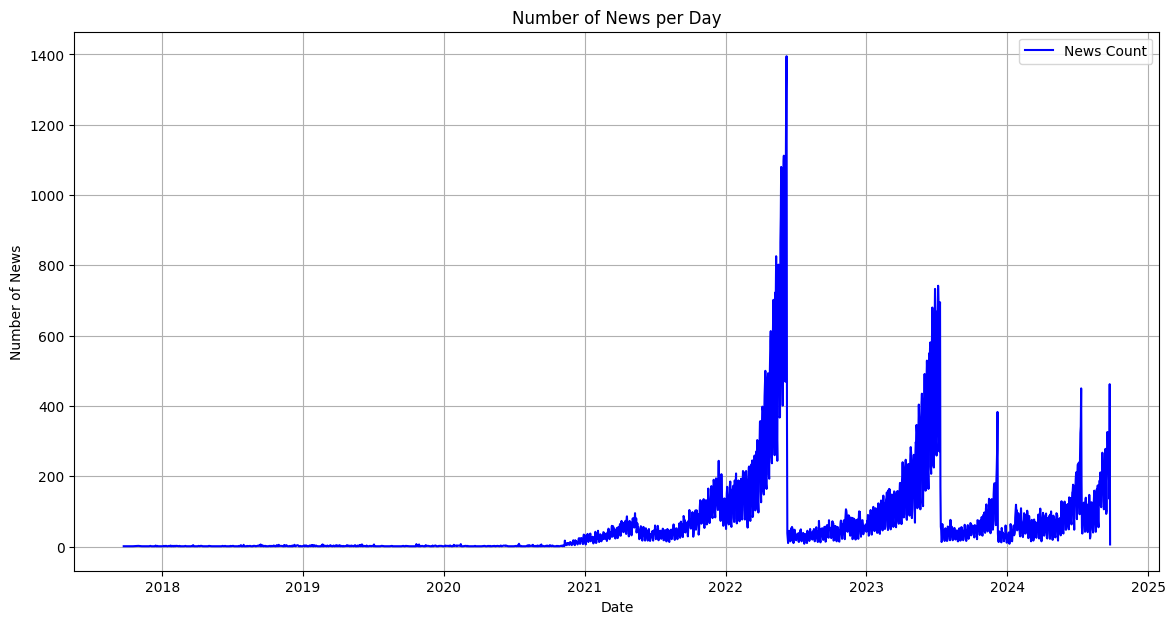

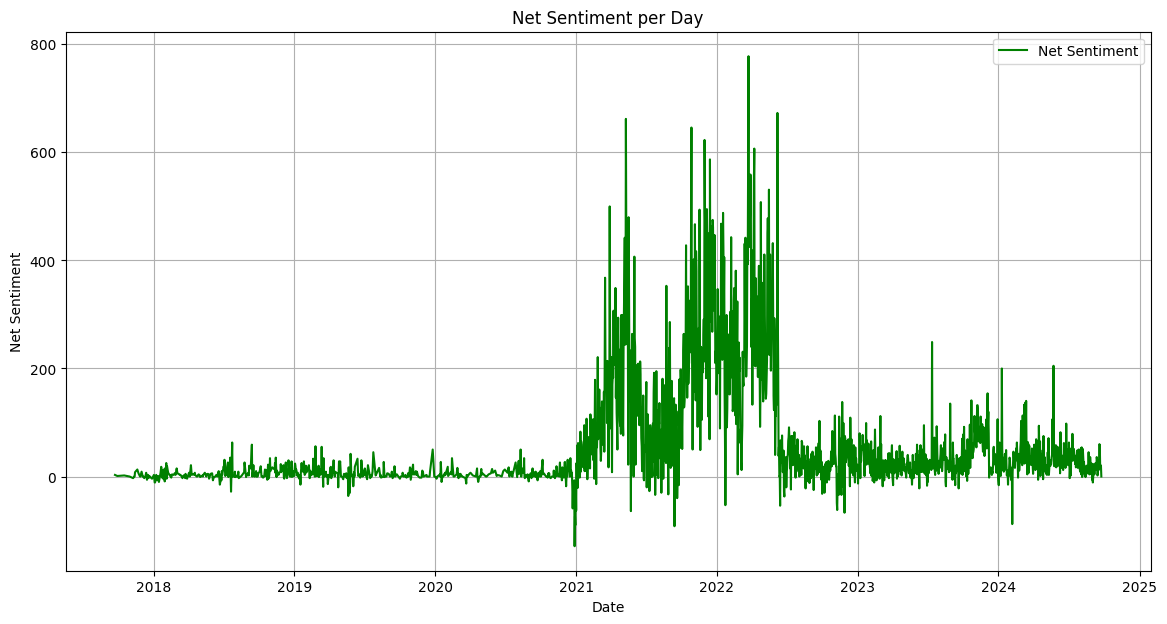

In [274]:
import matplotlib.pyplot as plt

# Grafico del numero di notizie per giorno
plt.figure(figsize=(14, 7))
plt.plot(news_per_day['date_normal'], news_per_day['news_count'], label='News Count', color='blue')
plt.title('Number of News per Day')
plt.xlabel('Date')
plt.ylabel('Number of News')
plt.grid()
plt.legend()
plt.show()

# Grafico del sentiment netto per giorno
plt.figure(figsize=(14, 7))
plt.plot(news_per_day['date_normal'], news_per_day['net_sentiment'], label='Net Sentiment', color='green')
plt.title('Net Sentiment per Day')
plt.xlabel('Date')
plt.ylabel('Net Sentiment')
plt.grid()
plt.legend()
plt.show()

3. Relazione con Cambi Significativi del Bitcoin

Possiamo confrontare queste metriche con le date significative del Bitcoin.

In [277]:
# Converti entrambe le colonne in formato datetime
news_per_day['date_normal'] = pd.to_datetime(news_per_day['date_normal'])
btc_segmented = btc_segmented.reset_index()  # Resetta l'indice per accedere alla colonna 'date'
btc_segmented['date'] = pd.to_datetime(btc_segmented['date'])

# Ora la merge dovrebbe funzionare
btc_news_combined = news_per_day.merge(
    btc_segmented,
    left_on='date_normal',
    right_on='date',
    how='left'  # Manteniamo tutte le date delle notizie
)

# Controllare il risultato
print(btc_news_combined.head())

  date_normal  news_count  total_positive  total_negative  total_important  \
0  2017-09-23           1               3               0                1   
1  2017-09-29           1               5               4                0   
2  2017-10-17           1               2               0                1   
3  2017-10-31           2               5               5                5   
4  2017-11-09           1               0               3                1   

   net_sentiment   index       date  Unnamed: 0         open  ...  \
0              3  1744.0 2017-09-23     10968.0  3629.919922  ...   
1              1  1750.0 2017-09-29     11065.0  4171.620117  ...   
2              2  1768.0 2017-10-17     11359.0  5741.580078  ...   
3              0  1782.0 2017-10-31     11600.0  6132.020020  ...   
4             -3  1791.0 2017-11-09     11754.0  7446.830078  ...   

         volume     marketCap                 timestamp  crypto_name  \
0  9.281140e+08  6.289207e+10  2017-09-23T23

In [278]:
print(news_per_day['date_normal'].dtype)  # Dovrebbe essere datetime64[ns]
print(btc_segmented['date'].dtype)       # Dovrebbe essere datetime64[ns]

datetime64[ns]
datetime64[ns]
